In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [73]:
nvd = pd.read_csv("repeat/nvd_cve_2024.csv", encoding="latin1", low_memory=False)

In [184]:
#cves = cves[~cves['class'].astype(str).str.startswith("Rejected Reason:")]
cves = cves[cves['assigner'] != 'cve-request@wordfence.com']
cves

,cve,assigner,cwe,vector,complexity,privileges,interaction,scope,confidentiality,integrity,availability,score,severity,exploitability,impact,score_int,severity_label
0,CVE-2024-0001,psirt@purestorage.com,CWE-1188,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9,10,CRITICAL
1,CVE-2024-0002,psirt@purestorage.com,NVD-CWE-noinfo,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9,10,CRITICAL
2,CVE-2024-0003,psirt@purestorage.com,NVD-CWE-noinfo,NETWORK,LOW,HIGH,NONE,UNCHANGED,HIGH,HIGH,HIGH,7.2,HIGH,1.2,5.9,7,HIGH
3,CVE-2024-0004,psirt@purestorage.com,CWE-94,NETWORK,LOW,HIGH,NONE,UNCHANGED,HIGH,HIGH,HIGH,7.2,HIGH,1.2,5.9,7,HIGH
4,CVE-2024-0005,psirt@purestorage.com,CWE-77,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,HIGH,8.8,HIGH,2.8,5.9,9,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44257,CVE-2025-31693,security@drupal.org,NONE,NAN,NAN,NAN,NAN,NONE,NAN,NAN,NAN,0.0,NONE,0.0,0.0,0,NONE
44258,CVE-2025-31694,security@drupal.org,NONE,NAN,NAN,NAN,NAN,NONE,NAN,NAN,NAN,0.0,NONE,0.0,0.0,0,NONE
44259,CVE-2025-31695,security@drupal.org,NONE,NAN,NAN,NAN,NAN,NONE,NAN,NAN,NAN,0.0,NONE,0.0,0.0,0,NONE
44260,CVE-2025-31696,security@drupal.org,NONE,NAN,NAN,NAN,NAN,NONE,NAN,NAN,NAN,0.0,NONE,0.0,0.0,0,NONE


After excluding Wordpress, there are 44,262 CVEs from the past 15 months.
Roughly 2950 per month; 148 per business day assuming a five day week without holidays.

In [187]:
pd.set_option('display.max_rows', 5)
cves = pd.read_csv("nvd-merged.csv", encoding="latin1", low_memory=False)
cves

,cve,assigner,cwe,vector,complexity,privileges,interaction,scope,confidentiality,integrity,availability,score,severity,exploitability,impact
0,CVE-2024-0001,psirt@purestorage.com,CWE-1188,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
1,CVE-2024-0002,psirt@purestorage.com,NVD-CWE-noinfo,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44260,CVE-2025-31696,security@drupal.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44261,CVE-2025-31697,security@drupal.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 1312 CVEs in the KEV at the time of this writing which is approximately 0.48% of the total CVE population of approx 274,000. We're currently doing 30-40k CVEs per year, which is an order of magnitude larger then a decade ago. If the growth curve continues we could be doing 100-200k per year a decade from now.

In [190]:
kev = pd.read_csv("kev.csv", encoding="latin1")
kev

,cveID,vendorProject,product,vulnerabilityName,dateAdded,shortDescription,requiredAction,dueDate,knownRansomwareCampaignUse,notes,cwes
0,CVE-2024-20439,Cisco,Smart Licensing Utility,Cisco Smart Licensing Utility Static Credentia...,2025-03-31,Cisco Smart Licensing Utility contains a stati...,"Apply mitigations per vendor instructions, fol...",2025-04-21,Unknown,https://sec.cloudapps.cisco.com/security/cente...,CWE-912
1,CVE-2025-2783,Google,Chromium Mojo,Google Chromium Mojo Sandbox Escape Vulnerability,2025-03-27,Google Chromium Mojo on Windows contains a san...,"Apply mitigations per vendor instructions, fol...",2025-04-17,Unknown,https://chromereleases.googleblog.com/2025/03/...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1310,CVE-2019-8394,Zoho,ManageEngine,Zoho ManageEngine ServiceDesk Plus (SDP) File ...,2021-11-03,Zoho ManageEngine ServiceDesk Plus (SDP) conta...,Apply updates per vendor instructions.,2022-05-03,Unknown,https://nvd.nist.gov/vuln/detail/CVE-2019-8394,CWE-434
1311,CVE-2020-29583,Zyxel,Multiple Products,Zyxel Multiple Products Use of Hard-Coded Cred...,2021-11-03,"Zyxel firewalls (ATP, USG, VM) and AP Controll...",Apply updates per vendor instructions.,2022-05-03,Unknown,https://nvd.nist.gov/vuln/detail/CVE-2020-29583,CWE-522


In [ ]:
# Boolean mask of matches
matches_mask = kev['cveID'].isin(cves['cve'])

# Count matched
num_matched = matches_mask.sum()

# Count not matched
num_not_matched = (~matches_mask).sum()

print(f"Matched: {num_matched}")
print(f"Not Matched: {num_not_matched}")
#matches_mask

In [95]:
nvdsmall.to_excel("nvd.xlsx", index=False)

In [194]:
numeric_fields = ['exploitability', 'impact', 'score']
for field in ['score', 'impact', 'exploitability']:
    cves.loc[:, field] = pd.to_numeric(cves[field], errors='coerce').fillna(0)

In [196]:
string_fields = ['cwe', 'scope', 'severity']
for field in string_fields:
    cves.loc[:, field] = cves[field].fillna('NONE')

In [198]:
nan_counts = cves.isna().sum()
pd.set_option('display.max_rows', 10)
print(nan_counts[nan_counts > 0])

vector             22425
complexity         22425
privileges         22425
interaction        22425
confidentiality    22425
integrity          22425
availability       22425
dtype: int64


In [200]:
cves.loc[:, 'exploitability'] = pd.to_numeric(cves['exploitability'], errors='coerce').fillna(0)
cves.loc[:, 'impact'] = pd.to_numeric(cves['impact'], errors='coerce').fillna(0)
cves.loc[:, 'score'] = pd.to_numeric(cves['score'], errors='coerce').fillna(0)

Let's plot some metrics in the CVEs that we currently use for prioritization;

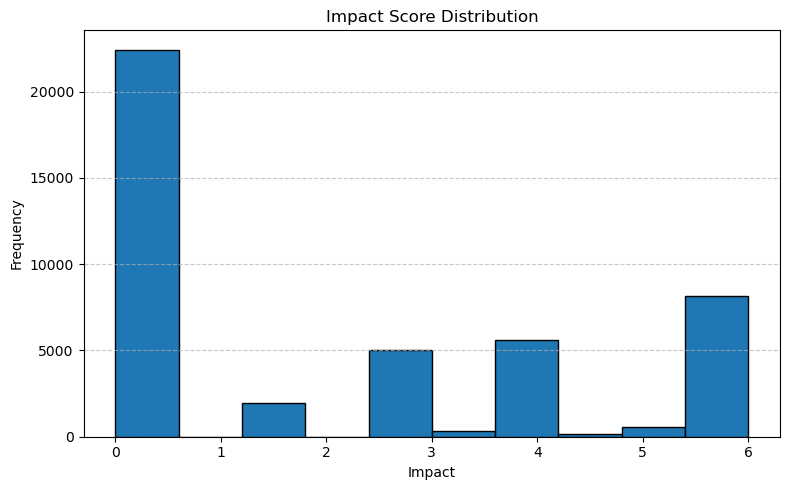

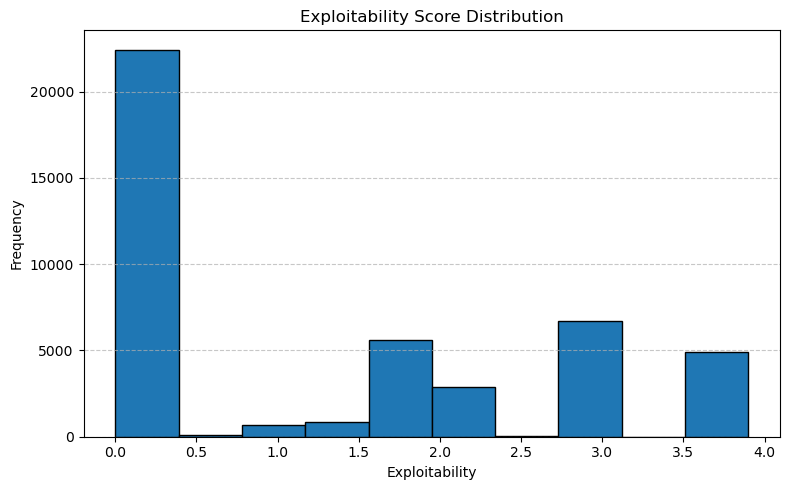

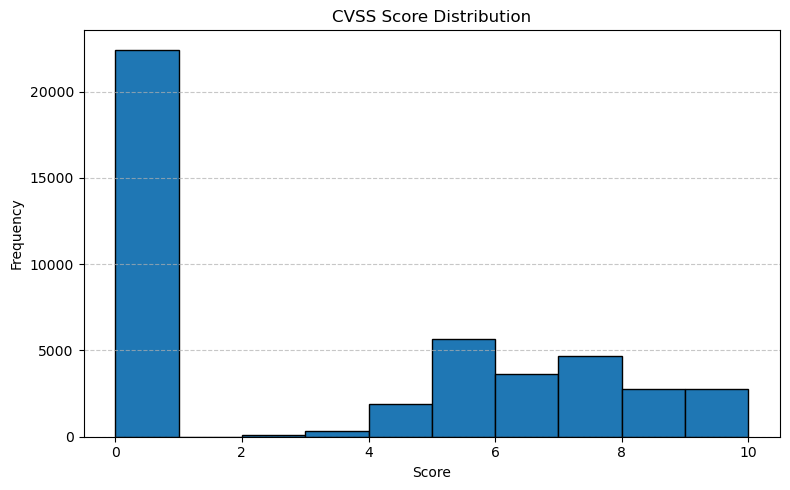

In [202]:
import matplotlib.pyplot as plt

# Impact histogram
plt.figure(figsize=(8, 5))
plt.hist(cves['impact'], bins=10, edgecolor='black')
plt.title("Impact Score Distribution")
plt.xlabel("Impact")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exploitability histogram
plt.figure(figsize=(8, 5))
plt.hist(cves['exploitability'], bins=10, edgecolor='black')
plt.title("Exploitability Score Distribution")
plt.xlabel("Exploitability")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# CVSS Score histogram
plt.figure(figsize=(8, 5))
plt.hist(cves['score'], bins=10, edgecolor='black')
plt.title("CVSS Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Let's plot some combination histograms

In [213]:
# Plotting severities and scores
cves.loc[:, 'score_int'] = cves['score'].fillna(0).round().astype(int)
cves.loc[:, 'severity_label'] = cves['severity'].fillna('none').astype(str)
# Group by severity and score_int
pivot = cves.groupby(['severity_label', 'score_int']).size().unstack(fill_value=0).sort_index()


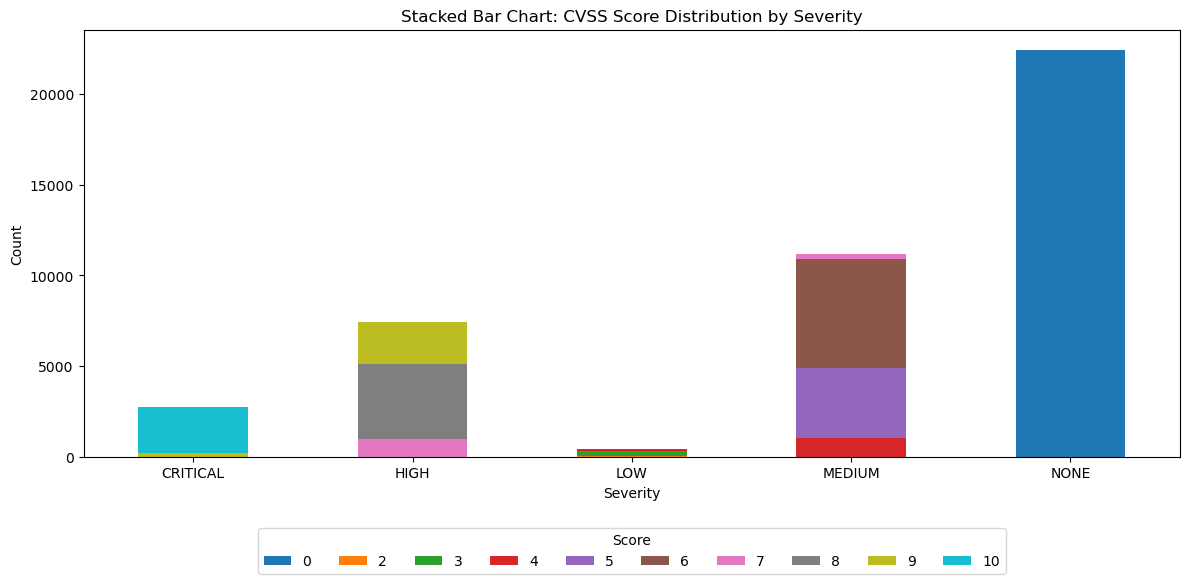

In [215]:
pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title("Stacked Bar Chart: CVSS Score Distribution by Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Score", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(pivot.columns))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [217]:
cves.loc[:, 'exploit_int'] = cves['exploitability'].fillna(0).round().astype(int)
cves.loc[:, 'severity_label'] = cves['severity'].fillna('none').astype(str)
pivot = cves.groupby(['severity_label', 'exploit_int']).size().unstack(fill_value=0).sort_index()

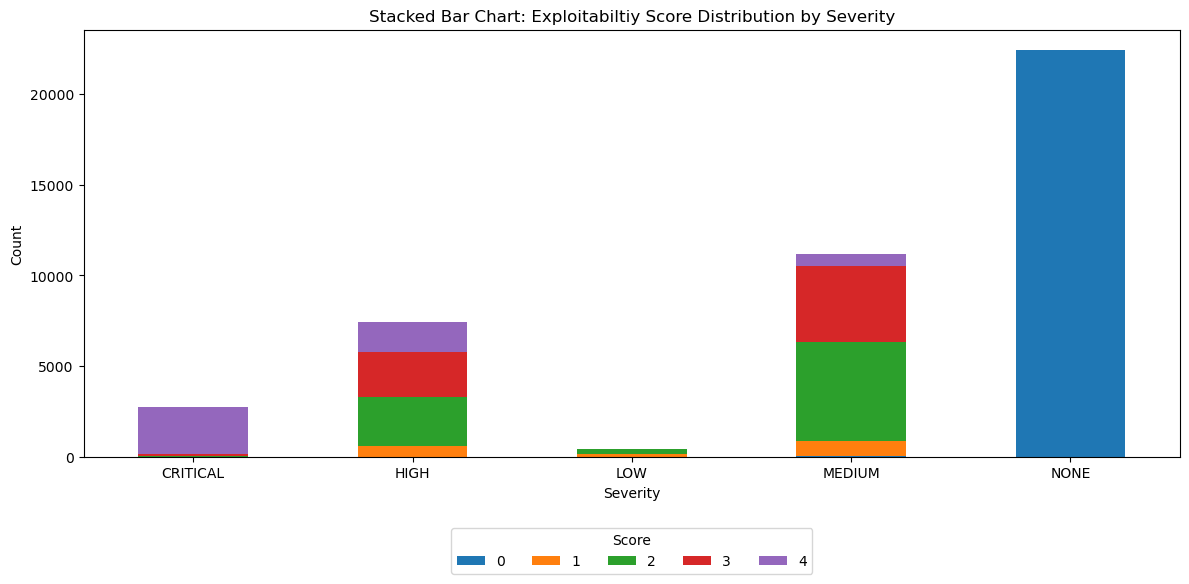

In [219]:
pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title("Stacked Bar Chart: Exploitabiltiy Score Distribution by Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Score", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(pivot.columns))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Let's make some scatter plots of some of these field combinations;

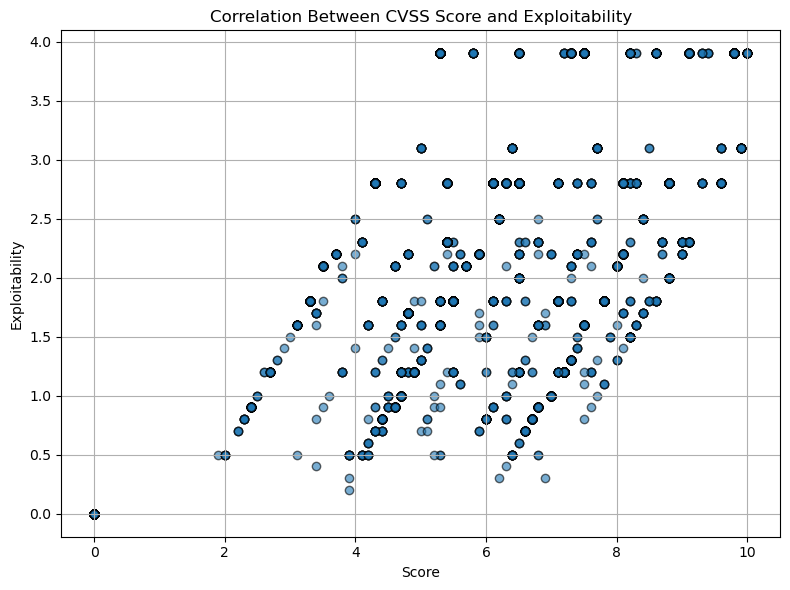

In [39]:

plt.figure(figsize=(8, 6))
plt.scatter(cves['score'], cves['exploitability'], alpha=0.6, edgecolors='k')
plt.title("Correlation Between CVSS Score and Exploitability")
plt.xlabel("Score")
plt.ylabel("Exploitability")
plt.grid(True)
plt.tight_layout()
plt.show()


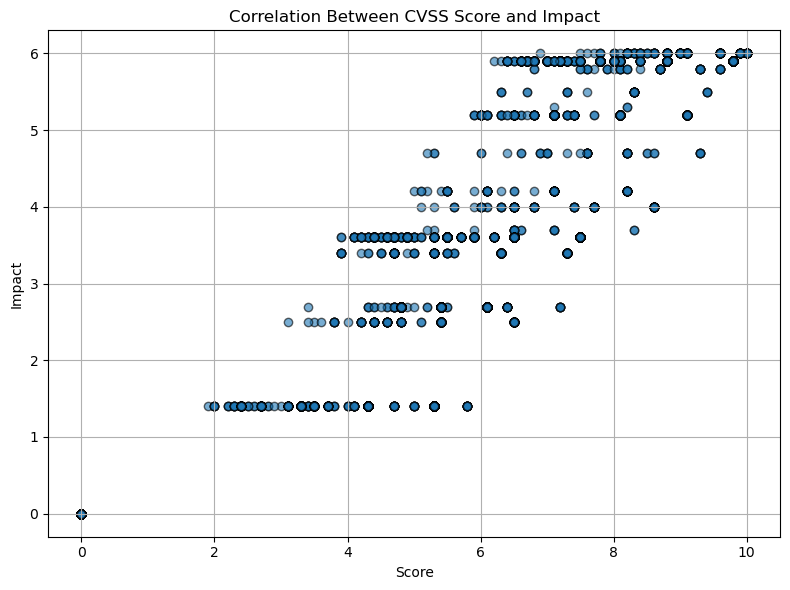

In [41]:

plt.figure(figsize=(8, 6))
plt.scatter(cves['score'], cves['impact'], alpha=0.6, edgecolors='k')
plt.title("Correlation Between CVSS Score and Impact")
plt.xlabel("Score")
plt.ylabel("Impact")
plt.grid(True)
plt.tight_layout()
plt.show()


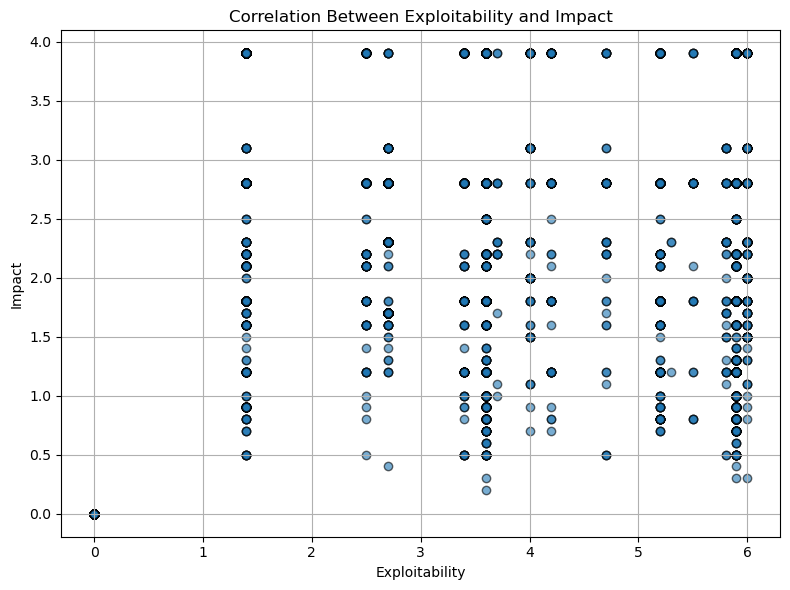

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(cves['impact'], cves['exploitability'], alpha=0.6, edgecolors='k')
plt.title("Correlation Between Exploitability and Impact")
plt.xlabel("Exploitability")
plt.ylabel("Impact")
plt.grid(True)
plt.tight_layout()
plt.show()

Maybe some correlations? Let’s calculate them

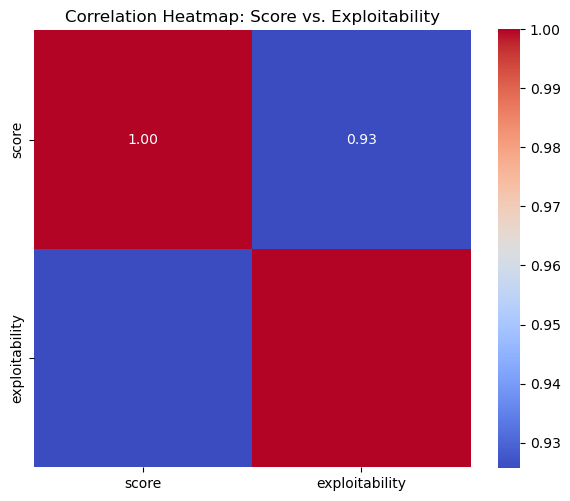

In [45]:
corr = cves[['score', 'exploitability']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap: Score vs. Exploitability")
plt.tight_layout()
plt.show()

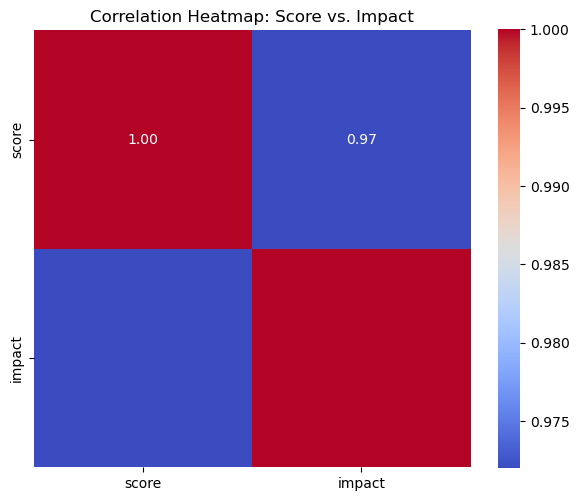

In [47]:
corr = cves[['score', 'impact']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap: Score vs. Impact")
plt.tight_layout()
plt.show()

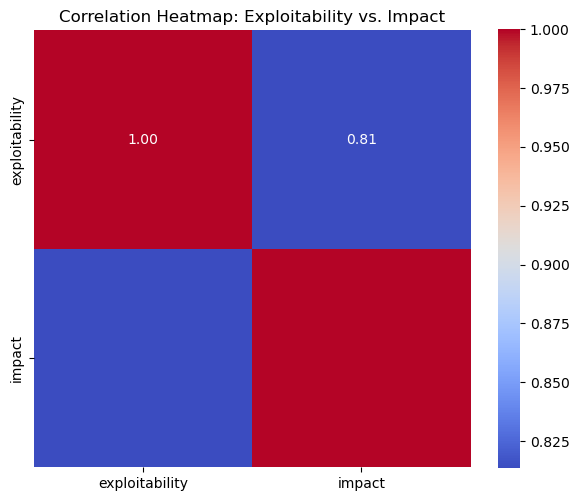

In [49]:
corr = cves[['exploitability', 'impact']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap: Exploitability vs. Impact")
plt.tight_layout()
plt.show()

In [51]:
correlation = cves[['score', 'exploitability']].corr(method='pearson')
print(correlation)

                   score  exploitability
score           1.000000        0.925666
exploitability  0.925666        1.000000


In [53]:
correlation = cves[['score', 'impact']].corr(method='pearson')
print(correlation)

           score    impact
score   1.000000  0.971991
impact  0.971991  1.000000


In [221]:
match = cves[cves['cve'].isin(kev['cveID'])]


Let's plot some metrics for the recent KEV listed CVEs;

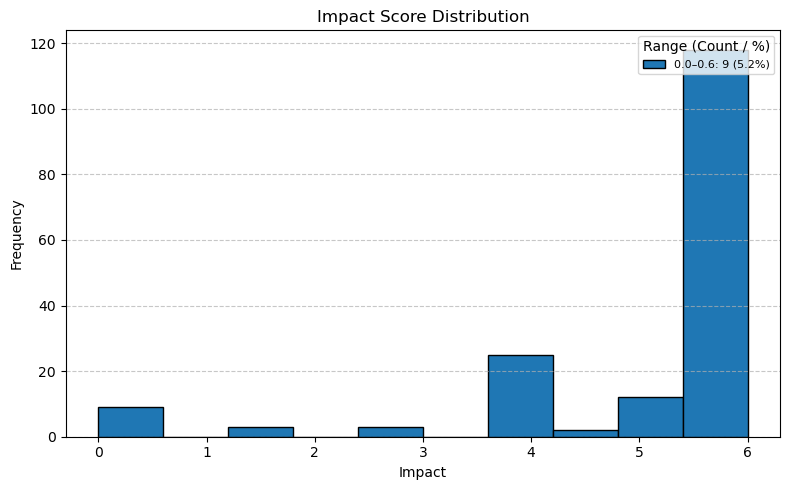

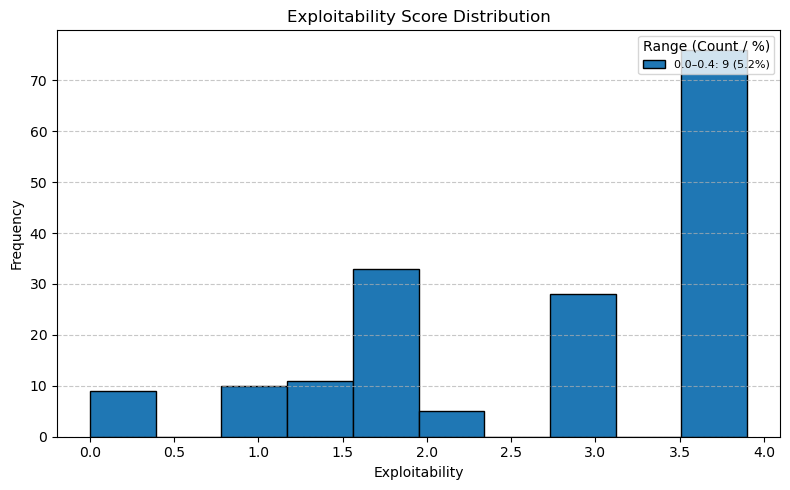

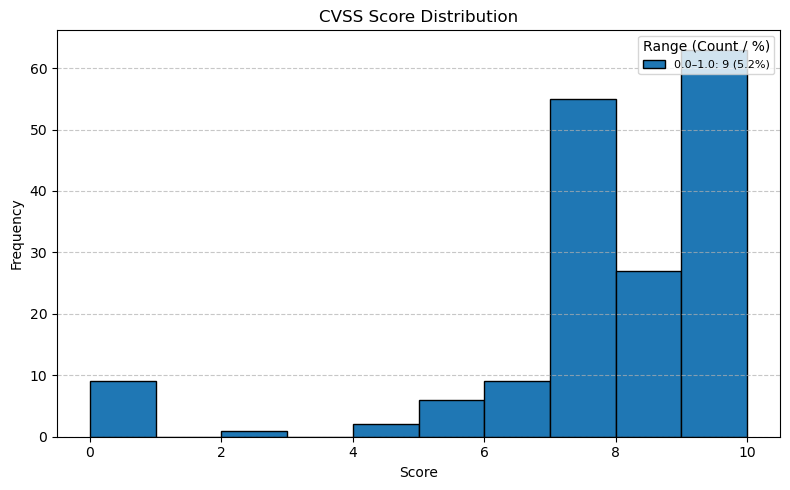

In [60]:

def add_histogram_with_legend(data, field, title, xlabel):
    plt.figure(figsize=(8, 5))
    counts, bins, patches = plt.hist(data, bins=10, edgecolor='black')

    total = counts.sum()
    labels = []
    for i in range(len(counts)):
        label = f"{bins[i]:.1f}–{bins[i+1]:.1f}: {int(counts[i])} ({counts[i]/total:.1%})"
        labels.append(label)
    plt.legend(labels, title="Range (Count / %)", loc="upper right", fontsize=8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot each histogram
add_histogram_with_legend(match['impact'], 'impact', "Impact Score Distribution", "Impact")
add_histogram_with_legend(match['exploitability'], 'exploitability', "Exploitability Score Distribution", "Exploitability")
add_histogram_with_legend(match['score'], 'score', "CVSS Score Distribution", "Score")


In [234]:
match = match.copy()
for col in match.select_dtypes(include='object').columns:
    match.loc[:, col] = match[col].astype(str).str.upper()
for col in match.select_dtypes(include='object').columns:
    match[col] = match[col].str.strip().str.lower().replace('none', np.nan)

In [236]:
def plot_bar_with_percent(data, title, xlabel):
    counts = data.fillna('none').astype(str).value_counts()
    total = counts.sum()
    percentages = counts / total
    legend_label = f"Total: {total}"

    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index, counts.values, edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")

    for bar, count, pct in zip(bars, counts.values, percentages.values):
        label = f"{count} ({pct:.1%})"
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            label,
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout()
    plt.legend([legend_label])
    plt.show()



Plots of some of the categorical values for the recent KEV listed CVEs;

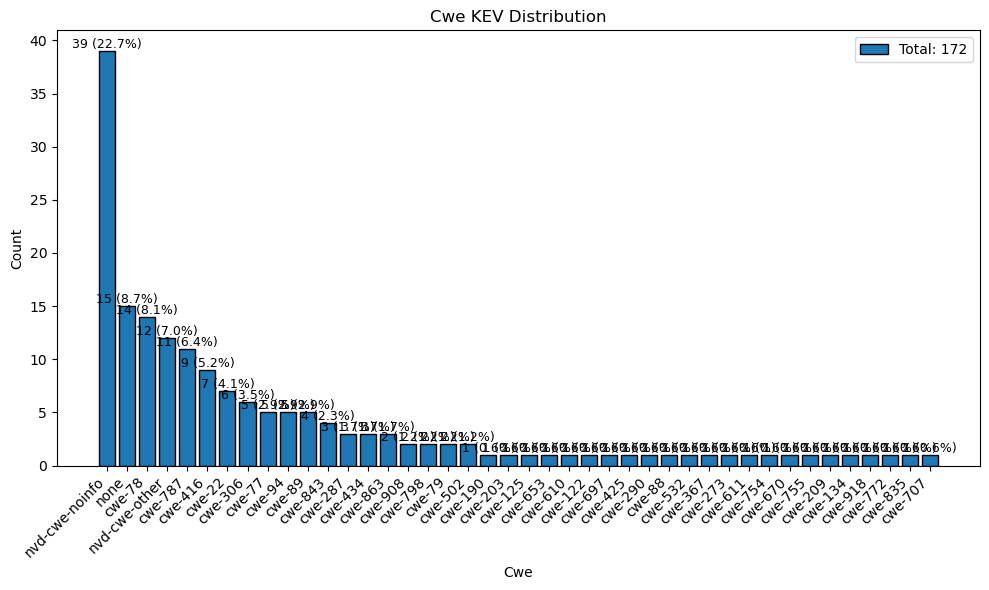

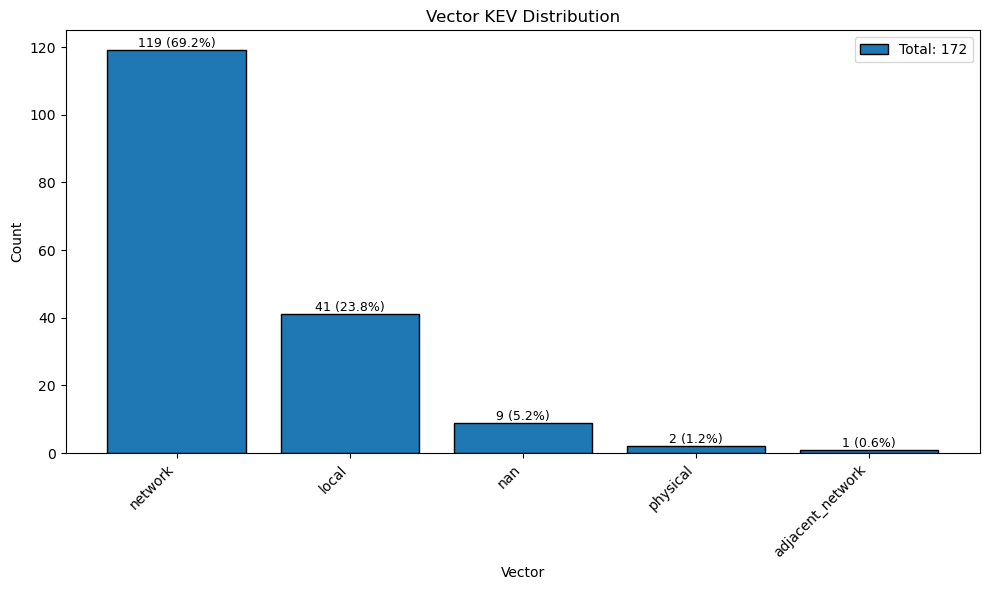

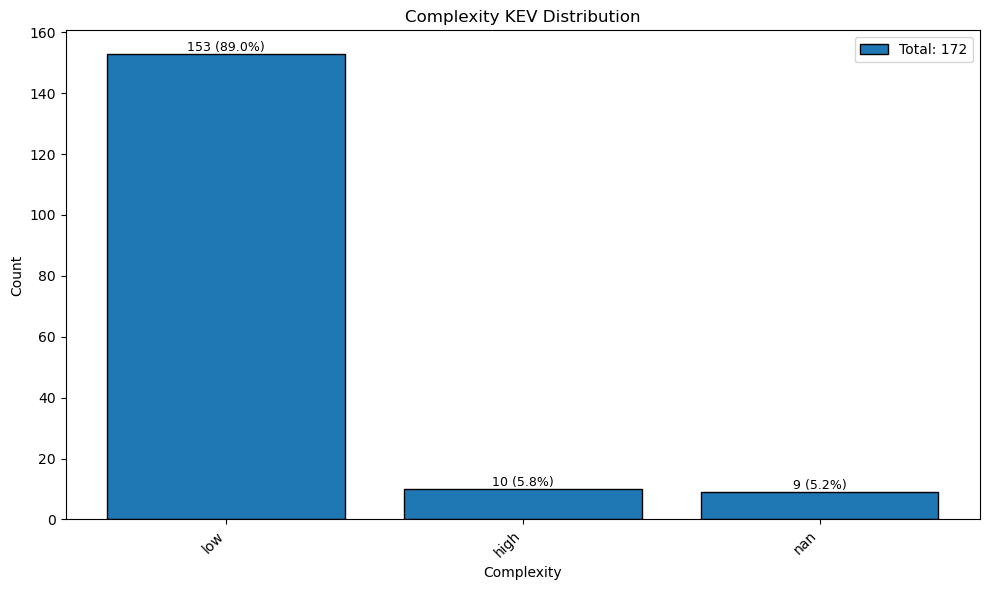

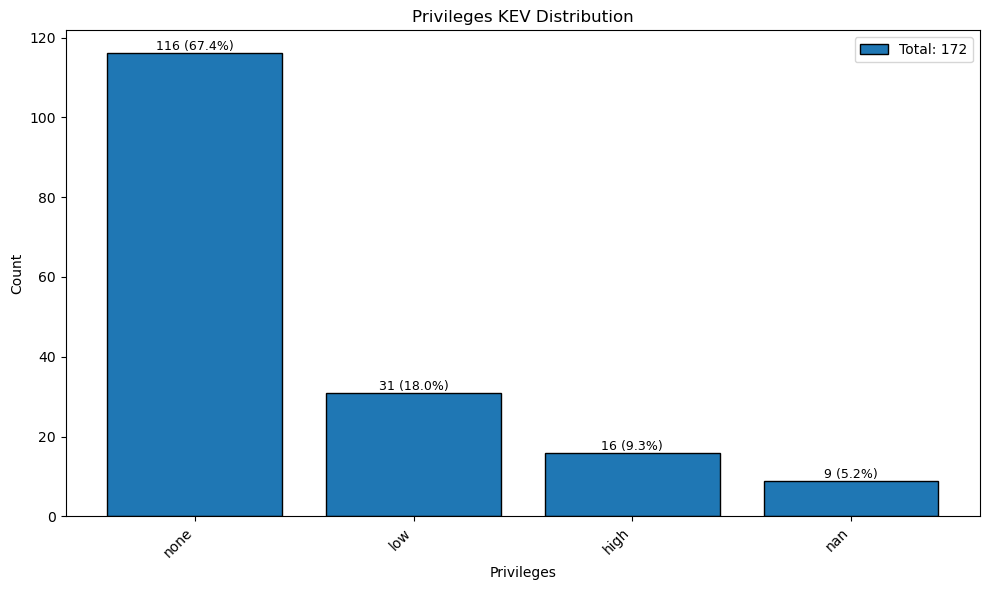

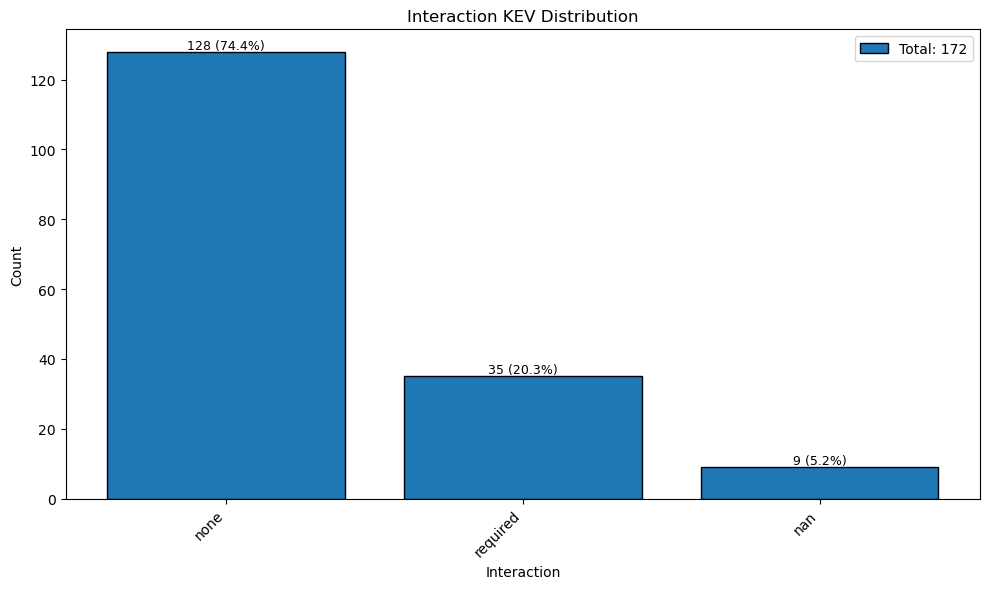

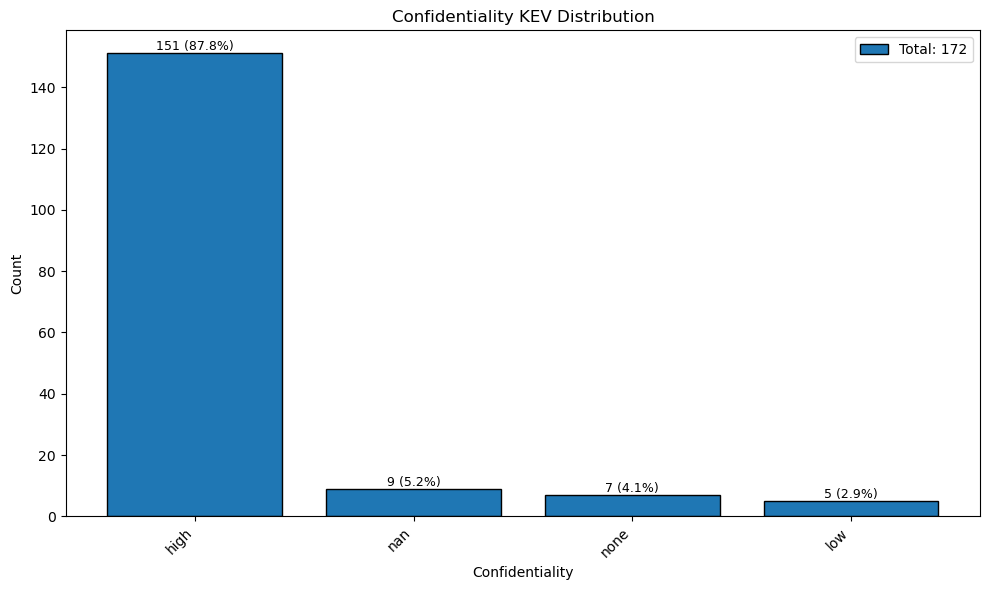

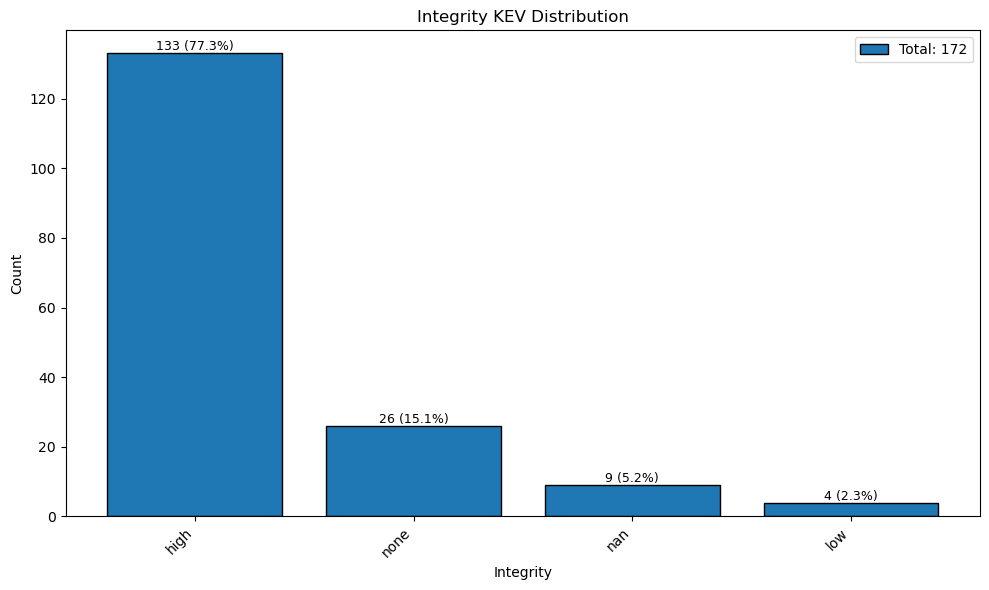

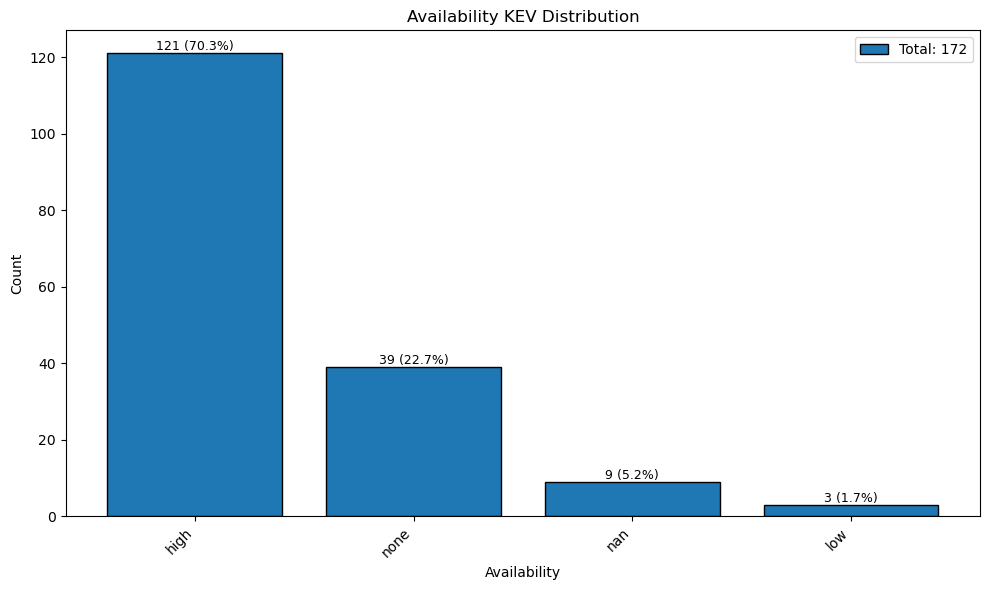

In [232]:
categorical_fields = [
    'cwe', 'vector', 'complexity', 'privileges',
    'interaction', 'confidentiality', 'integrity', 'availability'
]

for field in categorical_fields:
    plot_bar_with_percent(match[field], f"{field.capitalize()} KEV Distribution", field.capitalize())


In [243]:

fields_to_upper = ['vector', 'complexity', 'privileges', 'interaction', 'confidentiality', 'integrity', 'availability']
for field in fields_to_upper:
    cves[field] = cves[field].astype(str).str.upper().fillna('NONE')

conditions = [
    cves['vector'] == 'NETWORK',
    cves['complexity'] == 'LOW',
    cves['privileges'] == 'NONE',
    cves['interaction'] == 'NONE',
    cves['confidentiality'] == 'HIGH',
    cves['integrity'] == 'HIGH',
    cves['availability'] == 'HIGH'
]

# Rows matching ALL conditions
all_conditions = cves[conditions[0]]
for cond in conditions[1:]:
    all_conditions = all_conditions[cond]

all_unique = all_conditions.drop_duplicates()
count_all = len(all_unique)

# Rows matching ANY condition
any_match = cves[
    conditions[0] |
    conditions[1] |
    conditions[2] |
    conditions[3] |
    conditions[4] |
    conditions[5] |
    conditions[6]
]
warnings.filterwarnings("ignore")
any_unique = any_match.drop_duplicates()
count_any = len(any_unique)
print(f"CVEs matching AT LEAST ONE condition: {count_any}")
print(f"Number of CVEs: {len(cves)}")



CVEs matching AT LEAST ONE condition: 21836
Number of CVEs: 44262


Now let's plot some metric comparisons between the KEV CVEs and the CVE pupulation

In [252]:

fields = ['score', 'impact', 'exploitability']
stat_names = ['Mean', 'Median', 'StdDev']

data = []
for label, df in [('All CVEs', cves), ('KEV CVEs', match)]:
    for field in fields:
        series = pd.to_numeric(df[field], errors='coerce').dropna()
        data.append({
            'Dataset': label,
            'Field': field.capitalize(),
            'Mean': series.mean(),
            'Median': series.median(),
            'StdDev': series.std()
        })

stats_df = pd.DataFrame(data)


In [264]:
print((cves['score'] == 0).sum())
print((cves['score'].isna()).sum())

22425
0


In [262]:
stats_df

,Dataset,Field,Mean,Median,StdDev
0,All CVEs,Score,3.387190,0.0,3.638809
1,All CVEs,Impact,2.024631,0.0,2.325236
2,All CVEs,Exploitability,1.278060,0.0,1.434614
3,KEV CVEs,Score,7.910465,8.2,2.303596
4,KEV CVEs,Impact,5.076744,5.9,1.570948
5,KEV CVEs,Exploitability,2.718605,2.8,1.231365


In [254]:

melted = stats_df.melt(
    id_vars=['Dataset', 'Field'],
    value_vars=['Mean', 'Median', 'StdDev'],
    var_name='Statistic',
    value_name='Value'
)


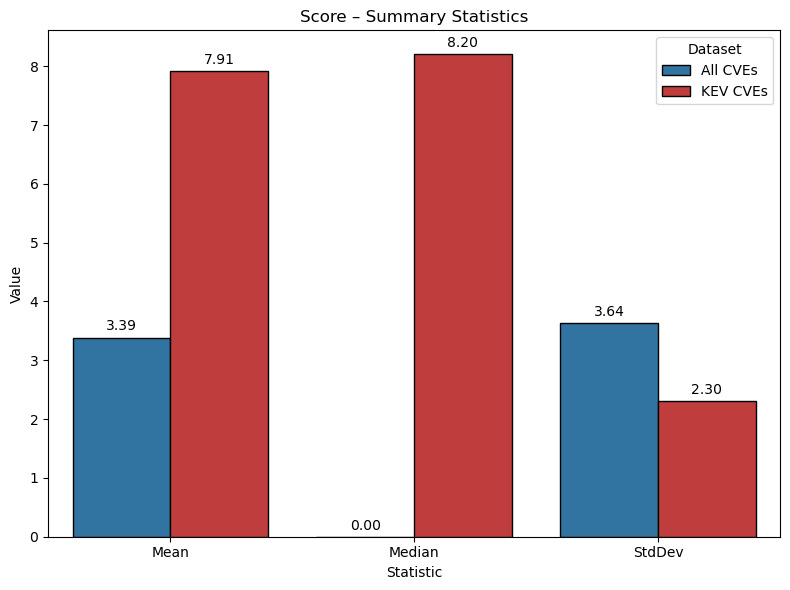

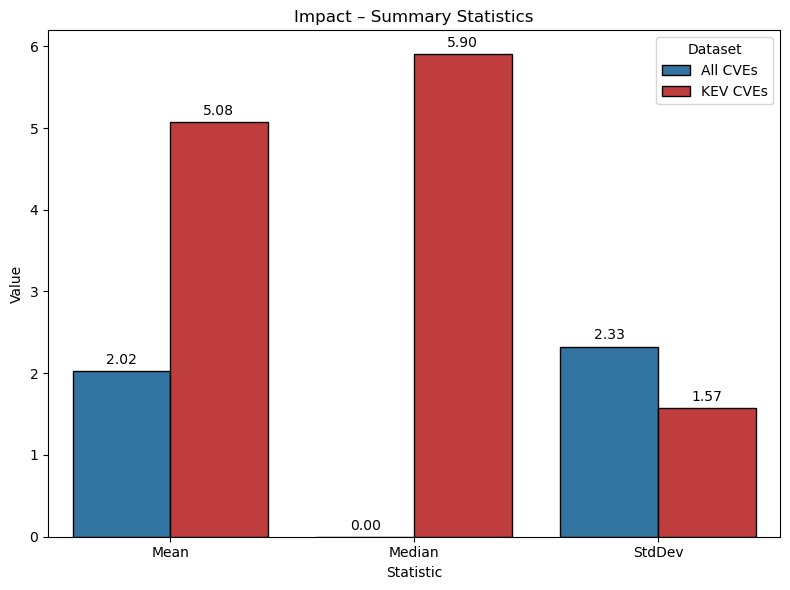

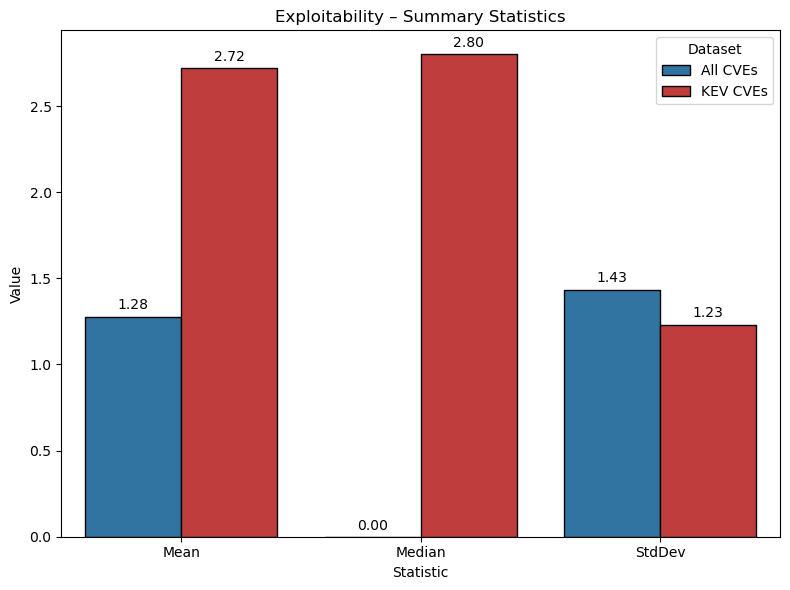

In [256]:

for field in melted['Field'].unique():
    subset = melted[melted['Field'] == field]
    color_map = {
        'All CVEs': '#1f77b4',       #  blue
        'KEV CVEs': '#d62728'    # red
    }
    bar_colors = subset['Dataset'].map(color_map)

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(
        data=subset,
        x='Statistic',
        y='Value',
        hue='Dataset',
        palette=color_map,
        edgecolor='black'

    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3)

    plt.title(f"{field} – Summary Statistics")
    plt.xlabel("Statistic")
    plt.ylabel("Value")
    plt.legend(title="Dataset")
    plt.tight_layout()
    plt.show()


In [130]:

fields = ['score', 'impact', 'exploitability']
stats = {}

for field in fields:
    series = pd.to_numeric(match[field], errors='coerce').dropna()
    stats[field.capitalize()] = {
        'Mean': round(series.mean(), 2),
        'Median': round(series.median(), 2),
        'StdDev': round(series.std(), 2)
    }

matched_stats_df = pd.DataFrame(stats).T 
print(matched_stats_df)



                Mean  Median  StdDev
Score           7.91     8.2    2.30
Impact          5.08     5.9    1.57
Exploitability  2.72     2.8    1.23


In [ ]:
print(match['score'].value_counts().sort_index())
print(match['impact'].value_counts().sort_index())
print(match['exploitability'].value_counts().sort_index())

If we take those metrics as thresholds, now many CVEs match?

In [279]:

for field in ['score', 'impact', 'exploitability']:
    cves[field] = pd.to_numeric(cves[field], errors='coerce')

total_cves = len(cves)
summary = []

for field in ['Score', 'Impact', 'Exploitability']:
    mean_val = matched_stats_df.loc[field, 'Mean']
    median_val = matched_stats_df.loc[field, 'Median']
    field_lower = field.lower()
    field_series = cves[field_lower].dropna()
    total_field = len(field_series)

    count_mean = field_series[field_series >= mean_val].count()
    count_median = field_series[field_series >= median_val].count()

    summary.append({
        'Field': field,
        'Mean Threshold': round(mean_val, 2),
        'Median Threshold': round(median_val, 2),
        'Total': total_field,
        'Count ≥ Mean': count_mean,
        '% ≥ Mean': f"{(count_mean / total_field):.1%}",
        'Count ≥ Median': count_median,
        '% ≥ Median': f"{(count_median / total_field):.1%}"
    })

threshold_summary_df = pd.DataFrame(summary)



In [353]:

for field in ['score', 'impact', 'exploitability']:
    cves[field] = pd.to_numeric(cves[field], errors='coerce')

score_mean = matched_stats_df.loc['Score', 'Mean']
score_median = matched_stats_df.loc['Score', 'Median']
impact_mean = matched_stats_df.loc['Impact', 'Mean']
impact_median = matched_stats_df.loc['Impact', 'Median']
expl_mean = matched_stats_df.loc['Exploitability', 'Mean']
expl_median = matched_stats_df.loc['Exploitability', 'Median']

matching_rows = cves[
    (cves['score'] >= score_mean) |
    (cves['score'] >= score_median) |
    (cves['impact'] >= impact_mean) |
    (cves['impact'] >= impact_median) |
    (cves['exploitability'] >= expl_mean) |
    (cves['exploitability'] >= expl_median)
]

count_unique_matches = len(unique_matching_rows)
total_cves = len(cves)
percent_unique_matches = (count_unique_matches / total_cves) * 100




In [283]:
threshold_summary_df

,Field,Mean Threshold,Median Threshold,Total,Count ≥ Mean,% ≥ Mean,Count ≥ Median,% ≥ Median
0,Score,7.91,8.2,44262,5524,12.5%,5164,11.7%
1,Impact,5.08,5.9,44262,8768,19.8%,8095,18.3%
2,Exploitability,2.72,2.8,44262,11658,26.3%,11658,26.3%


In [285]:
print(f"Total unique rows matching one or more thresholds: {count_unique_matches}")
print(f"Percentage of all CVEs: {percent_unique_matches:.1f}%")

Total unique rows matching one or more thresholds: 15371
Percentage of all CVEs: 34.7%


What about the categorical fields - 

In [321]:
categorical_field = 'vector'
cves_freq = cves[categorical_field].value_counts(normalize=True) * 100
match_freq = match[categorical_field].value_counts(normalize=True) * 100

print(f"CVEs {categorical_field} distribution (%):\n", cves_freq)
print(f"Match {categorical_field} distribution (%):\n", match_freq)


CVEs vector distribution (%):
 vector
NAN                 50.664227
NETWORK             35.199494
LOCAL               12.751344
ADJACENT_NETWORK     0.869821
PHYSICAL             0.515115
Name: proportion, dtype: float64
Match vector distribution (%):
 vector
network             69.186047
local               23.837209
nan                  5.232558
physical             1.162791
adjacent_network     0.581395
Name: proportion, dtype: float64


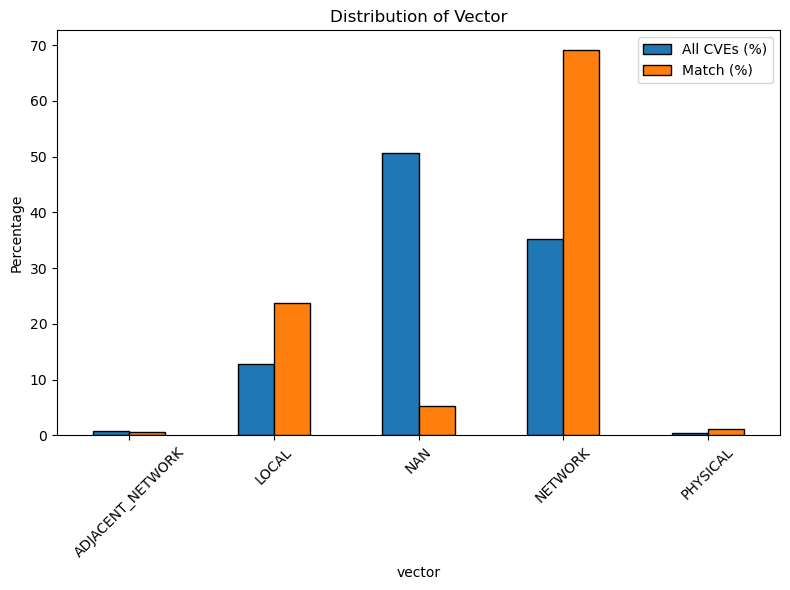

In [323]:
def plot_bar_comparison(field):
    cves_counts = cves[field].fillna('NONE').str.upper().value_counts(normalize=True) * 100
    match_counts = match[field].fillna('NONE').str.upper().value_counts(normalize=True) * 100

    df_compare = pd.DataFrame({
        'All CVEs (%)': cves_counts,
        'Match (%)': match_counts
    }).fillna(0)

    df_compare.plot(kind='bar', figsize=(8, 6), edgecolor='black')
    plt.title(f"Distribution of {field.capitalize()}")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_bar_comparison('vector')


Statistical Tests 

In [325]:
total = len(cves)
vectors = cves[cves['vector'].isin(['LOCAL', 'NETWORK'])].shape[0]
percentage = (vectors / total) * 100
print(f"Matching rows: {vectors}")
print(f"Percentage: {percentage:.2f}%")



Matching rows: 21224
Percentage: 47.95%


In [329]:
from scipy.stats import ttest_ind
score_cves = pd.to_numeric(cves['score'], errors='coerce')
score_matches = pd.to_numeric(match['score'], errors='coerce')
score_cves = score_cves.dropna()
score_matches = score_matches.dropna()
score_cves = score_cves[score_cves != 0]
score_matches = score_matches[score_matches != 0]

# Run the t-test using Welch's correction for unequal variances
t_stat, p_val = ttest_ind(score_cves, score_matches, equal_var=False)
print("Score t-test: t = {:.2f}, p = {:.3f}".format(t_stat, p_val))



Score t-test: t = -13.53, p = 0.000


In [333]:
from scipy.stats import mannwhitneyu
# Run the Mann–Whitney U test
u_stat, p_value = mannwhitneyu(score_cves, score_matches, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.3f}")


Mann-Whitney U statistic: 914031.50
P-value: 0.000


In [339]:
from scipy.stats import chi2_contingency
def chi2_test_for_field(field):
    cves_field = cves[field].astype(str).str.upper().fillna('NONE')
    matches_field = match[field].astype(str).str.upper().fillna('NONE')
    df_temp = pd.DataFrame({
        field: pd.concat([cves_field, matches_field], ignore_index=True),
        'group': ['cves'] * len(cves_field) + ['match'] * len(matches_field)
    })
    table = pd.crosstab(df_temp[field], df_temp['group'])
    chi2, p, dof, expected = chi2_contingency(table)
    return p

fields_categorical = ['vector', 'complexity', 'privileges', 'interaction', 
                      'confidentiality', 'integrity', 'availability']
for field in fields_categorical:
    p_val = chi2_test_for_field(field)
    print(f"Field '{field}' chi-square p-value: {p_val:.4f}")



Field 'vector' chi-square p-value: 0.0000
Field 'complexity' chi-square p-value: 0.0000
Field 'privileges' chi-square p-value: 0.0000
Field 'interaction' chi-square p-value: 0.0000
Field 'confidentiality' chi-square p-value: 0.0000
Field 'integrity' chi-square p-value: 0.0000
Field 'availability' chi-square p-value: 0.0000


In [351]:

fields = ['score', 'exploitability', 'impact']
results = {}

for field in fields:
    group_cves = pd.to_numeric(cves[field], errors='coerce').dropna()
    group_matches = pd.to_numeric(match[field], errors='coerce').dropna()
    group_cves = group_cves[group_cves != 0]
    group_matches = group_matches[group_matches != 0]
    
    # Perform t-test (Welch's t-test with equal_var=False)
    t_stat, p_val = ttest_ind(group_cves, group_matches, equal_var=False)
    results[field] = (t_stat, p_val)
    
    print(f"{field.capitalize()} t-test: t = {t_stat:.2f}, p = {p_val:.3f}")


Score t-test: t = -13.53, p = 0.000
Exploitability t-test: t = -3.28, p = 0.001
Impact t-test: t = -15.17, p = 0.000
